## Import libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

## Import dataset

In [42]:
df = pd.read_csv('food_delivery/df_final.csv')

## Describe dataset

In [43]:
# data type in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56447 entries, 0 to 56446
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   56447 non-null  int64  
 1   ID                           56447 non-null  object 
 2   Delivery_person_ID           56447 non-null  object 
 3   Delivery_person_Age          56447 non-null  float64
 4   Delivery_person_Ratings      56447 non-null  float64
 5   Restaurant_latitude          56447 non-null  float64
 6   Restaurant_longitude         56447 non-null  float64
 7   Delivery_location_latitude   56447 non-null  float64
 8   Delivery_location_longitude  56447 non-null  float64
 9   Order_Date                   56447 non-null  object 
 10  Hour_picked                  56447 non-null  int64  
 11  Weatherconditions            56447 non-null  object 
 12  Road_traffic_density         56447 non-null  object 
 13  Vehicle_conditio

In [44]:
# describe dataset

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,56447.0,NaN,NaN,NaN,28223.0,16294.989659,0.0,14111.5,28223.0,42334.5,56446.0
ID,56447,56447,0x4607,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delivery_person_ID,56447,1320,INDORES01DEL02,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delivery_person_Age,56447.0,NaN,NaN,NaN,29.854784,5.903283,15.0,25.0,30.0,35.0,50.0
Delivery_person_Ratings,56447.0,NaN,NaN,NaN,4.636308,0.324959,1.0,4.5,4.7,4.8,6.0
Restaurant_latitude,56447.0,NaN,NaN,NaN,17.394631,7.330978,0.0,12.934179,18.554382,22.732225,30.914057
Restaurant_longitude,56447.0,NaN,NaN,NaN,70.766797,21.120667,0.0,73.170283,75.898497,78.045359,88.433452
Delivery_location_latitude,56447.0,NaN,NaN,NaN,17.45827,7.332325,0.01,12.986113,18.632718,22.784648,31.054057
Delivery_location_longitude,56447.0,NaN,NaN,NaN,70.830435,21.120977,0.01,73.28,75.997522,78.102075,88.563452
Order_Date,56447,44,2022-04-01,1436,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# check for NA

df.isna().sum()

Unnamed: 0                     0
ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Hour_picked                    0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
City_code                      0
Time_Difference                0
distance                       0
day                            0
month                          0
day_of_week                    0
is_weekend                     0
Time_category                  0
dtype: int64

In [46]:
df.columns

Index(['Unnamed: 0', 'ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Hour_picked',
       'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Time_taken(min)', 'City_code', 'Time_Difference', 'distance',
       'day', 'month', 'day_of_week', 'is_weekend', 'Time_category'],
      dtype='object')

In [47]:
# check numerical columns and create a df with them

num_columns = df[['Time_taken(min)', 
                  'Delivery_person_Age', 
                  'Delivery_person_Ratings', 
                  'Hour_picked', 
                  'Vehicle_condition', 
                  'multiple_deliveries', 
                  'distance', 
                  'day', 
                  'month', 
                  'day_of_week']]

In [48]:
# check data types in columns

num_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56447 entries, 0 to 56446
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Time_taken(min)          56447 non-null  float64
 1   Delivery_person_Age      56447 non-null  float64
 2   Delivery_person_Ratings  56447 non-null  float64
 3   Hour_picked              56447 non-null  int64  
 4   Vehicle_condition        56447 non-null  int64  
 5   multiple_deliveries      56447 non-null  float64
 6   distance                 56447 non-null  float64
 7   day                      56447 non-null  int64  
 8   month                    56447 non-null  int64  
 9   day_of_week              56447 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 4.3 MB


In [49]:
# create a correlation matrix

num_columns.corr()

,Time_taken(min),Delivery_person_Age,Delivery_person_Ratings,Hour_picked,Vehicle_condition,multiple_deliveries,distance,day,month,day_of_week
Time_taken(min),1.000000,0.290018,-0.346875,0.203323,-0.245696,0.386527,0.318814,0.021338,-0.009765,0.009132
Delivery_person_Age,0.290018,1.000000,-0.066337,-0.004508,0.024911,0.110067,-0.003735,0.001995,-0.003498,0.006219
Delivery_person_Ratings,-0.346875,-0.066337,1.000000,-0.050690,0.039626,-0.115249,-0.103713,-0.007089,-0.009613,-0.005190
Hour_picked,0.203323,-0.004508,-0.050690,1.000000,0.004210,0.074508,0.484781,0.026920,-0.006034,0.009701
Vehicle_condition,-0.245696,0.024911,0.039626,0.004210,1.000000,-0.100617,0.003645,0.002868,0.001200,0.000535
multiple_deliveries,0.386527,0.110067,-0.115249,0.074508,-0.100617,1.000000,0.124104,0.012590,-0.010573,0.001383
distance,0.318814,-0.003735,-0.103713,0.484781,0.003645,0.124104,1.000000,0.051103,-0.012253,0.024008
day,0.021338,0.001995,-0.007089,0.026920,0.002868,0.012590,0.051103,1.000000,-0.327620,-0.042479
month,-0.009765,-0.003498,-0.009613,-0.006034,0.001200,-0.010573,-0.012253,-0.327620,1.000000,-0.013494
day_of_week,0.009132,0.006219,-0.005190,0.009701,0.000535,0.001383,0.024008,-0.042479,-0.013494,1.000000


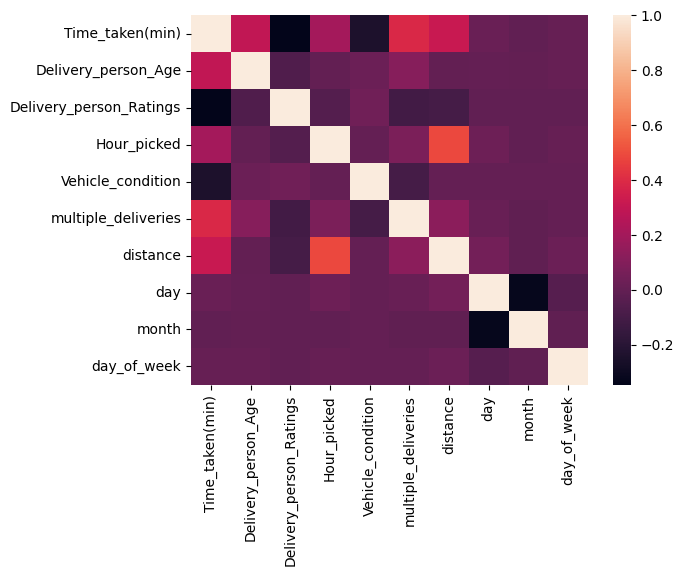

In [50]:
# create a heat map from correlation matrix

sns.heatmap(num_columns.corr()) ;

In [51]:
# day, month and day_of_week seem like they don't add much information to correlation matrix, so let's drop these columns
# let's keep only these:

num_columns = df[['Time_taken(min)', 
                  'Delivery_person_Age', 
                  'Delivery_person_Ratings', 
                  'Hour_picked', 
                  'Vehicle_condition', 
                  'multiple_deliveries', 
                  'distance']]

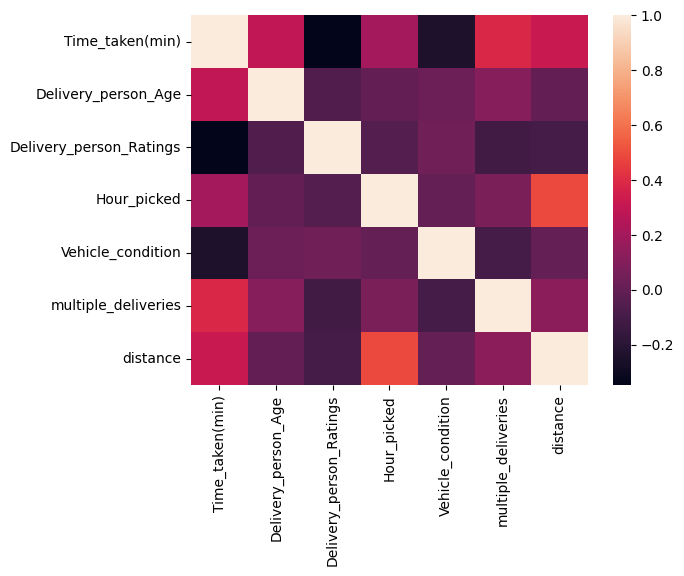

In [52]:
# create a new heat map of correlation matrix

sns.heatmap(num_columns.corr()) ;

In [53]:
# list of df columns

df.columns

Index(['Unnamed: 0', 'ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Hour_picked',
       'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Time_taken(min)', 'City_code', 'Time_Difference', 'distance',
       'day', 'month', 'day_of_week', 'is_weekend', 'Time_category'],
      dtype='object')

## Machine Learning Model

In [54]:
# create X and Y

X = df[['Delivery_person_Age', 'Delivery_person_Ratings', 
        'Hour_picked', 'Weatherconditions', 
        'Road_traffic_density', 'Vehicle_condition', 
        'Type_of_order', 'Type_of_vehicle', 
        'multiple_deliveries', 'Festival', 
        'City', 'distance', 
        'day', 'month', 
        'day_of_week', 'is_weekend', 
        'Time_category']]

In [55]:
y = df["Time_taken(min)"]
X

,Delivery_person_Age,Delivery_person_Ratings,Hour_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,distance,day,month,day_of_week,is_weekend,Time_category
0,37.0,4.9,11,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,3.02,19,3,5,1,morning
1,34.0,4.5,19,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,20.14,25,3,4,0,evening
2,23.0,4.4,8,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,1.55,19,3,5,1,morning
3,38.0,4.7,18,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,7.77,5,4,1,0,evening
4,32.0,4.6,13,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,6.20,26,3,5,1,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56442,35.0,4.6,21,Sunny,Jam,1,Snack,scooter,1.0,No,Metropolitian,16.37,27,3,6,1,evening
56443,33.0,4.9,11,Sandstorms,High,1,Drinks,scooter,1.0,No,Metropolitian,1.49,11,3,4,0,morning
56444,38.0,4.7,21,Fog,Low,3,Drinks,scooter,1.0,No,Metropolitian,9.11,11,3,4,0,evening
56445,27.0,4.7,18,Sandstorms,Medium,0,Meal,motorcycle,0.0,No,Metropolitian,19.66,6,3,6,1,evening


In [56]:
# create train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((45157, 17), (11290, 17), (45157,), (11290,))

In [57]:
# features encoding and scaling
# OneHotEncoder for Categorical values
# StandardScaler for numeric values

print("X_train before processing")
print(X_train)
print(X_train.shape)

numeric_features = [0,1,2,8,11]
numeric_transformer = StandardScaler()
## standardise the numercial values

categorical_features = [3,4,5,6,7,9,10,12,13,14,15,16]
categorical_transformer = OneHotEncoder()
## alternatively we can drop the first column

featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
        ]
)

X_train = featureencoder.fit_transform(X_train)
X_test = featureencoder.transform(X_test)

print("X_train after processing")
print(X_train)
print(X_train.shape)

X_train before processing
       Delivery_person_Age  Delivery_person_Ratings  Hour_picked  \
5902                  32.0                      4.8           17   
1603                  21.0                      4.3           12   
26272                 39.0                      4.8           20   
12845                 26.0                      4.9           11   
14439                 29.0                      4.9           20   
...                    ...                      ...          ...   
45891                 31.0                      4.6           17   
52416                 31.0                      4.9           18   
42613                 21.0                      4.8           20   
43567                 27.0                      4.9           21   
2732                  26.0                      4.6            0   

      Weatherconditions Road_traffic_density  Vehicle_condition Type_of_order  \
5902             Stormy               Medium                  0          Mea

## Linear Regression

In [58]:
# actual model: Linear regression

classifier = LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression()

In [59]:
# model scores

classifier.score(X_train, y_train), classifier.score(X_test,y_test)

(0.6405982878297692, 0.6286602499094531)

## Random Forest

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor


In [61]:
# actual model

random_forest = RandomForestRegressor(n_estimators = 100, max_depth=15, min_samples_split=100)
random_forest.fit(X_train, y_train)                  # This steps is the actual training
y_train_pred_forest = random_forest.predict(X_train)

In [62]:
# model scores

print("Score sur Train set ",random_forest.score(X_train, y_train))
print("Score sur Test  set ",random_forest.score(X_test, y_test))

Score sur Train set  0.8643720841372377
Score sur Test  set  0.847919443333506


In [63]:
y_test_pred_forest = random_forest.predict(X_test)
print(y_test_pred_forest[:5])
print()

[46.17396441 29.34118115 23.05880027 21.83254411 26.17979053]



In [64]:
# calulating features importances

random_forest.feature_importances_

array([4.54646740e-02, 4.86114444e-02, 6.27034391e-04, 6.06570650e-04,
       8.26125454e-02, 6.13012007e-04, 2.46291781e-04, 5.69550441e-03,
       1.23404594e-01, 1.89098865e-02, 7.70167073e-02, 1.01101533e-04,
       8.88661805e-05, 1.70119801e-03, 2.07157596e-04, 2.29215385e-04,
       1.89499697e-04, 2.21631455e-04, 3.02731710e-06, 1.10641290e-04,
       1.70688745e-04, 1.37849858e-04, 6.86246330e-03, 5.76950842e-03,
       1.73517469e-03, 2.35075094e-03, 1.57211637e-03, 1.01834077e-04,
       1.61522952e-04, 1.22787337e-04, 8.81668428e-05, 1.12202279e-04,
       1.30656159e-04, 9.57879766e-05, 8.83622771e-05, 6.74106343e-05,
       1.78026201e-04, 1.22395050e-04, 9.93049800e-05, 1.02997426e-04,
       1.15070769e-04, 1.20961795e-04, 1.09531392e-04, 9.30921636e-05,
       5.46826170e-05, 8.60218685e-05, 1.45911761e-04, 1.17503057e-04,
       7.09457488e-05, 1.18400105e-04, 1.18085696e-04, 1.21653049e-04,
       1.14258416e-04, 1.38439065e-04, 1.09959808e-04, 1.75037574e-04,
      